In [223]:
import geopandas as gpd
import pandas as pd
import seaborn as sns

### January 2019
Join monthwise PM2.5 file and LST raster zonal statistics file to identify level of LST and PM2.5 increses or decreses as respect to month (2019 data consider as pre covid period)


### Read PM2.5 data file if january2019

In [224]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/Jan_2019.csv",encoding= 'unicode_escape')

In [225]:
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))

In [212]:
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:30:00+00:00,03-01-2019,T22:00:00+05:30,64.22,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
1,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:30:00+00:00,03-01-2019,T22:00:00+05:30,81.96,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
2,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:30:00+00:00,03-01-2019,T22:00:00+05:30,78.96,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
3,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:15:00+00:00,03-01-2019,T21:45:00+05:30,77.86,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
4,6984,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2019-01-03T16:15:00+00:00,03-01-2019,T21:45:00+05:30,56.00,Âµg/mÂ³,13.029152,77.585901,POINT (77.58590 13.02915)


### Change coordinate refrence system

In [226]:
d1=d1.set_crs('epsg:4326')

In [227]:
d1=d1.to_crs('epsg:32643')

In [228]:
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Read LST zonal statstics file using geopandas

In [230]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_201901.GeoJson")

In [231]:
d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,33.775811,33.373795,34.188250,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,33.438398,33.292784,33.668206,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,34.145755,33.719167,34.585196,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,34.226279,33.795034,34.598876,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,33.160721,32.478660,33.919464,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


### Plot PM2.5 location of Bangalore

<AxesSubplot:>

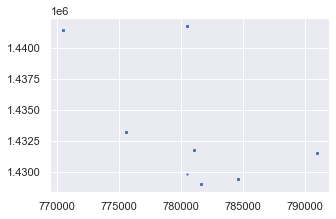

In [232]:
d1.plot(markersize=1.5,figsize=(5,5))

### Making buffer for locations of PM2.5 banglore

In [233]:
d1['geometry'] = d1.geometry.buffer(500)

<AxesSubplot:>

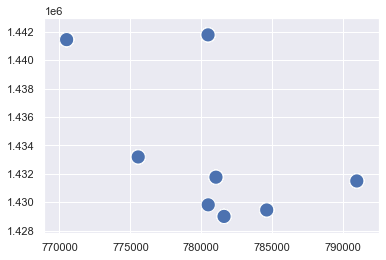

In [234]:
d1.plot()

### Spatial join of PM2.5 values of January 2019 and Zonal statistics of LST raster file values

In [235]:
January2019_spatial_join= gpd.sjoin(d1,d2, how='inner')

In [236]:
January2019_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:30:00+00:00,03-01-2019,T22:00:00+05:30,64.22,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,29.572025,28.227926,30.658538
6,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:15:00+00:00,03-01-2019,T21:45:00+05:30,52.59,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,29.572025,28.227926,30.658538
13,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T16:00:00+00:00,03-01-2019,T21:30:00+05:30,43.28,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,29.572025,28.227926,30.658538
23,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T15:45:00+00:00,03-01-2019,T21:15:00+05:30,43.28,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,29.572025,28.227926,30.658538
24,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-01-03T15:30:00+00:00,03-01-2019,T21:00:00+05:30,43.28,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,29.572025,28.227926,30.658538


### Save final output in csv format

In [254]:
January2019_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/January2019_spatial_join.csv")

### February 2019

In [238]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/feb_2019.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T05:30:00+00:00,14-02-2019,T11:00:00+05:30,27.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
1,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T05:30:00+00:00,14-02-2019,T11:00:00+05:30,42.00,Âµg/mÂ³,12.951913,77.539784,POINT (77.53978 12.95191)
2,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2019-02-14T05:30:00+00:00,14-02-2019,T11:00:00+05:30,96.92,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
3,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T05:15:00+00:00,14-02-2019,T10:45:00+05:30,27.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
4,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2019-02-14T05:15:00+00:00,14-02-2019,T10:45:00+05:30,96.92,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)


In [239]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [241]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_201902.GeoJson")
d2.head()


,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,41.042741,40.626873,41.266533,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,40.976630,40.594149,41.217142,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,41.508044,41.068903,41.781757,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,41.697752,41.512392,41.813357,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,40.781985,40.212877,41.319136,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


<AxesSubplot:>

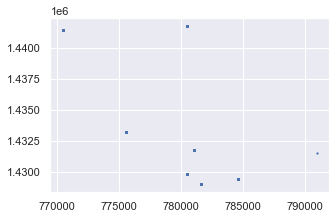

In [242]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

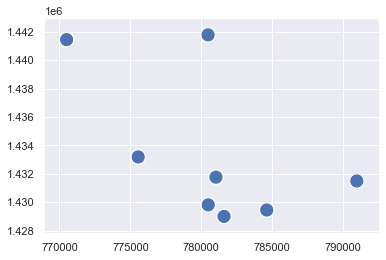

In [243]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

### Spatial join of PM2.5 and LST vlaues

In [244]:
February2019_spatial_join= gpd.sjoin(d1,d2, how='inner')
February2019_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T05:30:00+00:00,14-02-2019,T11:00:00+05:30,27.0,Âµg/mÂ³,12.938539,...,"POLYGON ((781529.639 1431761.978, 781527.231 1...",49498,49499,780896.557282,1.432292e+06,780996.557282,1.432192e+06,33.87712,33.720352,34.155955
3,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T05:15:00+00:00,14-02-2019,T10:45:00+05:30,27.0,Âµg/mÂ³,12.938539,...,"POLYGON ((781529.639 1431761.978, 781527.231 1...",49498,49499,780896.557282,1.432292e+06,780996.557282,1.432192e+06,33.87712,33.720352,34.155955
10,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T05:00:00+00:00,14-02-2019,T10:30:00+05:30,38.0,Âµg/mÂ³,12.938539,...,"POLYGON ((781529.639 1431761.978, 781527.231 1...",49498,49499,780896.557282,1.432292e+06,780996.557282,1.432192e+06,33.87712,33.720352,34.155955
14,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T04:45:00+00:00,14-02-2019,T10:15:00+05:30,38.0,Âµg/mÂ³,12.938539,...,"POLYGON ((781529.639 1431761.978, 781527.231 1...",49498,49499,780896.557282,1.432292e+06,780996.557282,1.432192e+06,33.87712,33.720352,34.155955
19,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-02-14T04:15:00+00:00,14-02-2019,T09:45:00+05:30,38.0,Âµg/mÂ³,12.938539,...,"POLYGON ((781529.639 1431761.978, 781527.231 1...",49498,49499,780896.557282,1.432292e+06,780996.557282,1.432192e+06,33.87712,33.720352,34.155955


In [245]:
February2019_spatial_join.to_file("C:/Users/rajpa/Desktop/final_JOIN/February2019_spatial_join.GeoJson")

In [263]:
February2019_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/February2019_spatial_join.csv")

### 

### April 2019

In [246]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/april_2019.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-04-26T08:15:00+00:00,26-04-2019,T13:45:00+05:30,85.00,Âµg/mÂ³,12.951913,77.539784,POINT (77.53978 12.95191)
1,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-04-26T15:30:00+00:00,26-04-2019,T21:00:00+05:30,226.67,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
2,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-04-27T08:30:00+00:00,27-04-2019,T14:00:00+05:30,59.57,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
3,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-04-27T09:00:00+00:00,27-04-2019,T14:30:00+05:30,54.46,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
4,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2019-04-27T09:00:00+00:00,27-04-2019,T14:30:00+05:30,9.10,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)


In [247]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

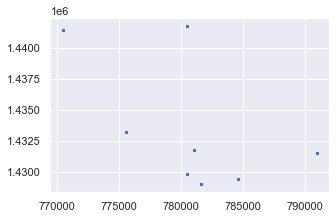

In [248]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

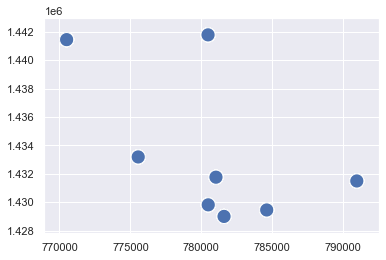

In [249]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [250]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_201904.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,720165.0,1470225.0,720265.0,1470125.0,-127.313967,-127.313967,-127.313967,"POLYGON ((720165.000 1470225.000, 720265.000 1..."
1,2,720165.0,1470125.0,720265.0,1470025.0,-127.313967,-127.313967,-127.313967,"POLYGON ((720165.000 1470125.000, 720265.000 1..."
2,3,720165.0,1470025.0,720265.0,1469925.0,-127.313967,-127.313967,-127.313967,"POLYGON ((720165.000 1470025.000, 720265.000 1..."
3,4,720165.0,1469925.0,720265.0,1469825.0,-127.313967,-127.313967,-127.313967,"POLYGON ((720165.000 1469925.000, 720265.000 1..."
4,5,720165.0,1469825.0,720265.0,1469725.0,-127.313967,-127.313967,-127.313967,"POLYGON ((720165.000 1469825.000, 720265.000 1..."


In [251]:
April2019_spatial_join= gpd.sjoin(d1,d2, how='inner')
April2019_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-04-26T08:15:00+00:00,26-04-2019,T13:45:00+05:30,85.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",325376,325377,775065.0,1433425.0,775165.0,1433325.0,37.502319,37.074728,37.820845
352,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-04-28T06:30:00+00:00,28-04-2019,T12:00:00+05:30,85.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",325376,325377,775065.0,1433425.0,775165.0,1433325.0,37.502319,37.074728,37.820845
358,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-04-28T06:45:00+00:00,28-04-2019,T12:15:00+05:30,85.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",325376,325377,775065.0,1433425.0,775165.0,1433325.0,37.502319,37.074728,37.820845
383,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-04-28T08:15:00+00:00,28-04-2019,T13:45:00+05:30,45.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",325376,325377,775065.0,1433425.0,775165.0,1433325.0,37.502319,37.074728,37.820845
386,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-04-28T08:30:00+00:00,28-04-2019,T14:00:00+05:30,45.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",325376,325377,775065.0,1433425.0,775165.0,1433325.0,37.502319,37.074728,37.820845


In [252]:
April2019_spatial_join.to_file("C:/Users/rajpa/Desktop/final_JOIN/April2019_spatial_join.GeoJson")

In [264]:
April2019_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/April2019_spatial_join.csv")

### May 2019

In [255]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/may_2019.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T01:15:00+00:00,03-05-2019,T06:45:00+05:30,53.23,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
1,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00+00:00,03-05-2019,T06:45:00+05:30,31.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
2,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00+00:00,03-05-2019,T06:45:00+05:30,42.00,Âµg/mÂ³,12.917348,77.622813,POINT (77.62281 12.91735)
3,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:15:00+00:00,03-05-2019,T06:45:00+05:30,23.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)
4,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2019-05-03T01:00:00+00:00,03-05-2019,T06:30:00+05:30,18.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)


In [256]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

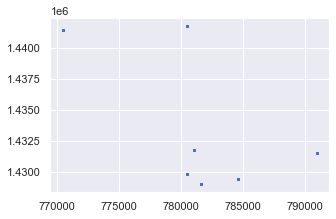

In [257]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

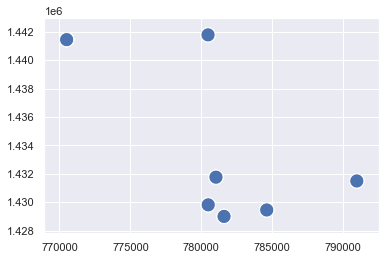

In [258]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [259]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_201905.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,37.530263,37.446129,37.583527,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,37.572229,37.415196,37.911860,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,37.871666,37.601118,37.975796,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,37.876929,37.690259,37.997606,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,36.845043,36.241001,37.377475,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


In [260]:
May2019_spatial_join= gpd.sjoin(d1,d2, how='inner')
May2019_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T01:15:00+00:00,03-05-2019,T06:45:00+05:30,53.23,Âµg/mÂ³,13.02702,...,"POLYGON ((771010.937 1441451.519, 771008.529 1...",14706,14707,770896.557282,1.441492e+06,770996.557282,1.441392e+06,30.699663,30.567716,30.790258
7,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T00:45:00+00:00,03-05-2019,T06:15:00+05:30,38.83,Âµg/mÂ³,13.02702,...,"POLYGON ((771010.937 1441451.519, 771008.529 1...",14706,14707,770896.557282,1.441492e+06,770996.557282,1.441392e+06,30.699663,30.567716,30.790258
11,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T00:30:00+00:00,03-05-2019,T06:00:00+05:30,38.83,Âµg/mÂ³,13.02702,...,"POLYGON ((771010.937 1441451.519, 771008.529 1...",14706,14707,770896.557282,1.441492e+06,770996.557282,1.441392e+06,30.699663,30.567716,30.790258
15,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T00:15:00+00:00,03-05-2019,T05:45:00+05:30,38.83,Âµg/mÂ³,13.02702,...,"POLYGON ((771010.937 1441451.519, 771008.529 1...",14706,14707,770896.557282,1.441492e+06,770996.557282,1.441392e+06,30.699663,30.567716,30.790258
19,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2019-05-03T00:00:00+00:00,03-05-2019,T05:30:00+05:30,46.68,Âµg/mÂ³,13.02702,...,"POLYGON ((771010.937 1441451.519, 771008.529 1...",14706,14707,770896.557282,1.441492e+06,770996.557282,1.441392e+06,30.699663,30.567716,30.790258


In [261]:
May2019_spatial_join.to_file("C:/Users/rajpa/Desktop/final_JOIN/May2019_spatial_join.GeoJson")

In [262]:
May2019_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/May2019_spatial_join.csv")

In [199]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/july_2020.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T18:45:00+00:00,01-07-2020,T00:15:00+05:30,18.32,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
1,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T18:45:00+00:00,01-07-2020,T00:15:00+05:30,26.97,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
2,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T18:45:00+00:00,01-07-2020,T00:15:00+05:30,9.77,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
3,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-06-30T19:00:00+00:00,01-07-2020,T00:30:00+05:30,18.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
4,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T19:15:00+00:00,01-07-2020,T00:45:00+05:30,26.97,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)


In [200]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

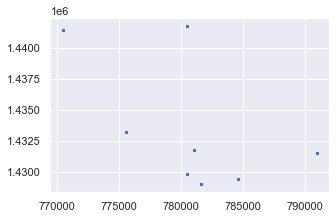

In [201]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

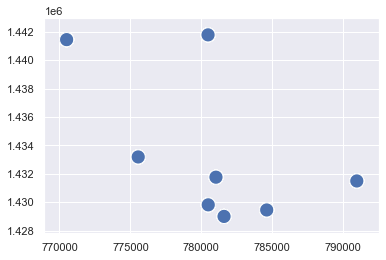

In [202]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [204]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202007.GeoJson")

d2.head()

,OBJECTID,ASS_CONST1,WARD_NO,WARD_NAME,AREA_SQ_KM,LAT,LON,mean,min,max,geometry
0,1,Yelahanka,2,Chowdeswari Ward,7.06,13.12170945,77.58042209,24.70692088,0,29.02013892,POINT (77.58042 13.12171)
1,2,Yelahanka,3,Atturu,10.15,13.10280487,77.56003776,24.7456192,21.52994259,26.81172177,POINT (77.56004 13.10280)
2,3,Yelahanka,4,Yelahanka Satellite Town,4.9,13.09098666,77.58392543,24.71736348,23.02798405,26.44361829,POINT (77.58393 13.09099)
3,4,K.R. Puram,51,Vijnanapura,2.05,13.00606326,77.6695653,25.00571876,23.37823139,28.36260502,POINT (77.66957 13.00606)
4,5,K.R. Puram,53,Basavanapura,6.28,13.01684703,77.71545647,24.51968958,0,26.64092452,POINT (77.71546 13.01685)


In [206]:
July2020_spatial_join= gpd.sjoin(d1,d2, how='inner')
July2020_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,OBJECTID,ASS_CONST1,WARD_NO,WARD_NAME,AREA_SQ_KM,LAT,LON,mean,min,max
2,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T18:45:00+00:00,01-07-2020,T00:15:00+05:30,9.77,Âµg/mÂ³,12.913522,...,193,Jaya Nagar,177,J P Nagar,1.79,12.91088176,77.59450677,24.87521297,22.97468045,26.52996389
5,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T19:15:00+00:00,01-07-2020,T00:45:00+05:30,9.77,Âµg/mÂ³,12.913522,...,193,Jaya Nagar,177,J P Nagar,1.79,12.91088176,77.59450677,24.87521297,22.97468045,26.52996389
6,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T19:45:00+00:00,01-07-2020,T01:15:00+05:30,8.07,Âµg/mÂ³,12.913522,...,193,Jaya Nagar,177,J P Nagar,1.79,12.91088176,77.59450677,24.87521297,22.97468045,26.52996389
10,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T21:00:00+00:00,01-07-2020,T02:30:00+05:30,7.46,Âµg/mÂ³,12.913522,...,193,Jaya Nagar,177,J P Nagar,1.79,12.91088176,77.59450677,24.87521297,22.97468045,26.52996389
18,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-06-30T22:45:00+00:00,01-07-2020,T04:15:00+05:30,3.32,Âµg/mÂ³,12.913522,...,193,Jaya Nagar,177,J P Nagar,1.79,12.91088176,77.59450677,24.87521297,22.97468045,26.52996389


In [207]:
July2020_spatial_join.to_file("C:/Users/rajpa/Desktop/final_JOIN/July2020_spatial_join.GeoJson")

In [265]:
July2020_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/July2020_spatial_join.csv")